In [506]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random as rand


Text(0.5, 1.0, 'Image')

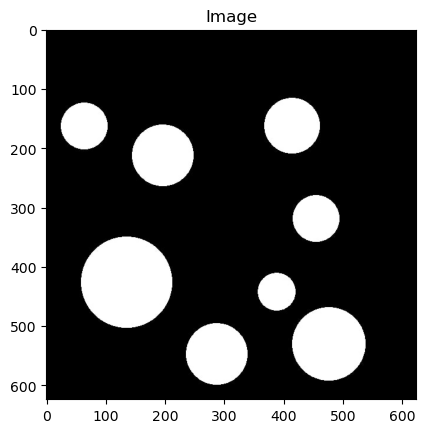

In [507]:
image = cv.imread('circleBW.jpg')
# image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(image)
plt.title('Image')

Text(0.5, 1.0, 'HSV Channels')

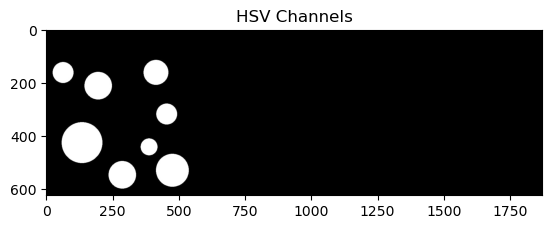

In [508]:
HSVimg = cv.cvtColor(image,cv.COLOR_BGR2HSV)
HSVimg = cv.cvtColor(HSVimg,cv.COLOR_BGR2RGB)
h,s,v = cv.split(HSVimg)
window2 = cv.hconcat([h, s, v])
window2 = cv.cvtColor(window2,cv.COLOR_BGR2RGB)
plt.imshow(window2)
plt.title('HSV Channels')

Text(0.5, 1.0, 'Thresholding')

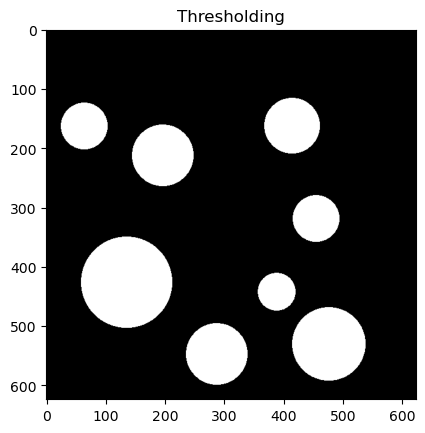

In [509]:
ret,mask = cv.threshold(h,140,255,cv.THRESH_BINARY)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
plt.imshow(mask)
plt.title('Thresholding')

Text(0.5, 1.0, 'Dialated')

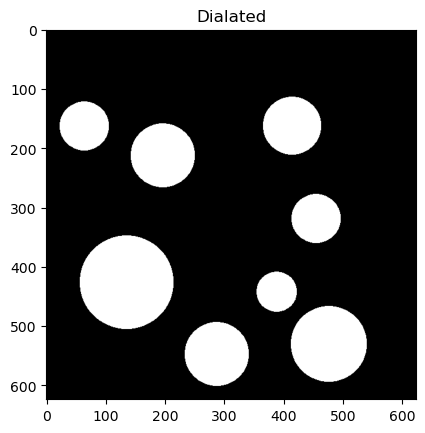

In [510]:
kern = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
opened = cv.morphologyEx(mask, cv.MORPH_OPEN, kern)
img = cv.dilate(mask,kern)
plt.imshow(img)
plt.title('Dialated')

# img = cv.bitwise_and(dialte,opened)
# plt.imshow(img)
# plt.title('Segment')

Text(0.5, 1.0, 'Canny Edge Detection')

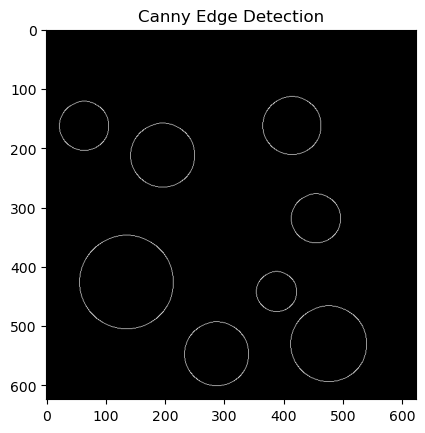

In [511]:
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
gray = cv.medianBlur(gray, 7)

edges = cv.Canny(gray,190,200)

plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Detection')

In [512]:
indices = np.where(edges != [0])
coordinates = list(zip(indices[0], indices[1]))

In [513]:
class Circle:
    def __init__(self, xCenter, yCenter, radius):
        self.xCenter = xCenter
        self.yCenter = yCenter
        self.radius = radius

def circleDetectionRANSAC(edgePoints, bestCircles, iterations):
    
    for _ in range(iterations):
        A = rand.choice(edgePoints)
        B = rand.choice(edgePoints)
        C = rand.choice(edgePoints)
        
        midpt_AB = ((A[0]+B[0])*0.5, (A[1]+B[1])*0.5)
        midpt_BC = ((B[0]+C[0])*0.5, (B[1]+C[1])*0.5)
        
        slope_AB = (B[1] - A[1]) / (B[0] - A[0] + 0.000000001)
        intercept_AB = A[1] - slope_AB * A[0]
        slope_BC = (C[1] - B[1]) / (C[0] - B[0] + 0.000000001)
        intercept_BC = C[1] - slope_BC * C[0]
        
        slope_midptAB = -1.0 / slope_AB
        slope_midptBC = -1.0 / slope_BC
        intercept_midptAB = midpt_AB[1] - slope_midptAB * midpt_AB[0]
        intercept_midptBC = midpt_BC[1] - slope_midptBC * midpt_BC[0]
        
        centerX = (intercept_midptBC - intercept_midptAB) / (slope_midptAB - slope_midptBC)
        centerY = slope_midptAB * centerX + intercept_midptAB
        center = (centerX, centerY)
        diffradius = (center[0] - A[0], center[1] - A[1])
        radius = np.sqrt(diffradius[0]**2 + diffradius[1]**2)
        circumference = 2.0 * np.pi * radius
        onCircle = []
        notOnCircle = []
        radiusThreshold = 9
        
        for i, point in enumerate(edgePoints):
            diffCenter = (point[0] - center[0], point[1] - center[1])
            distanceToCenter = np.sqrt(diffCenter[0]**2 + diffCenter[1]**2)
            if abs(distanceToCenter - radius) < radiusThreshold:
                onCircle.append(i)
            else:
                notOnCircle.append(i)
        
        if len(onCircle) >= circumference:
            circleFound = Circle(center[0], center[1], radius)
            bestCircles.append(circleFound)
            
            toKeep = [edgePoints[i] for i in notOnCircle]
            edgePoints = toKeep
        
        if len(edgePoints) < 100:
            break
    return bestCircles

def drawCircles(img, bestCircles, limit):
    for i in range(min(limit, len(bestCircles))):
        circle = bestCircles[i]
        print(circle.xCenter, circle.yCenter,circle.radius)
        cv.circle(img, (int(circle.yCenter), int(circle.xCenter)), int(circle.radius), (255,0,0), 4)
    return img
   




/tmp/ipykernel_848/3496902936.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  slope_midptBC = -1.0 / slope_BC
/tmp/ipykernel_848/3496902936.py:27: RuntimeWarning: invalid value encountered in scalar divide
  centerX = (intercept_midptBC - intercept_midptAB) / (slope_midptAB - slope_midptBC)
/tmp/ipykernel_848/3496902936.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  slope_midptAB = -1.0 / slope_AB


425.552631578047 134.55263157754132 79.44862797908372
211.19475137906275 195.87016574355772 54.32989145582773
547.9563758379747 288.04362415971525 53.47473637416225
319.1496053574904 454.980746233192 41.50630998961932
529.8102189785075 477.496350364431 63.59880445394763
161.78315411987603 64.27060931983166 40.78967603119542
162.61509433953614 413.9250943396662 49.25881387489041
441.7826086950599 387.86956521673153 34.131127105245234


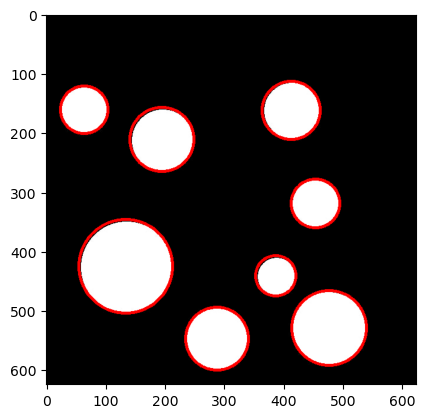

In [514]:
bestCircles = []
circles = circleDetectionRANSAC(coordinates,bestCircles, 1500)
finalResult = drawCircles(image,bestCircles,len(bestCircles))
plt.imshow(finalResult)
